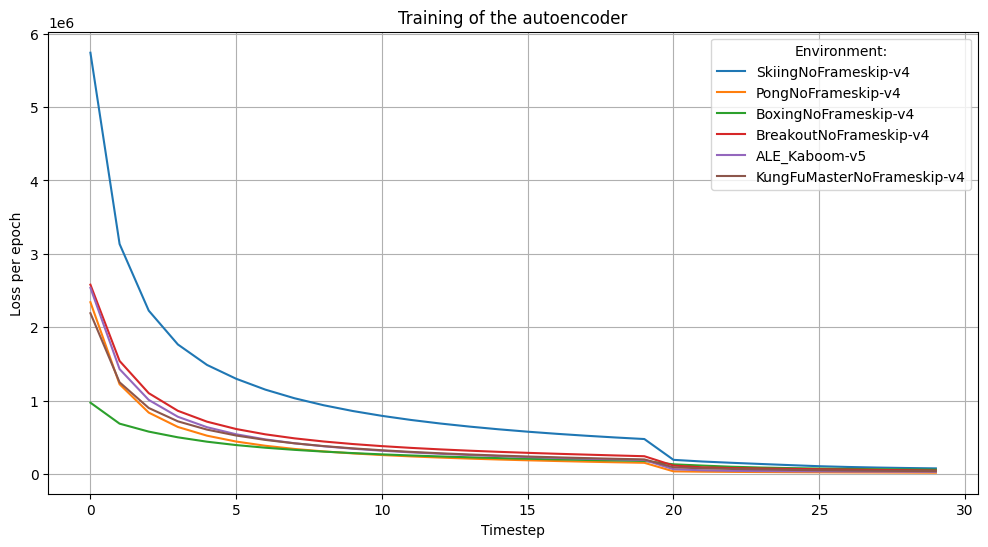

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

dfs = []
for file in os.listdir("autoencoders/"):
    if file.endswith(".csv"):
        df = pd.read_csv("autoencoders/" + file)
        df['File'] = file.split('.')[0]
        dfs.append(df)

# Concatenate the DataFrames
df = pd.concat(dfs)

# Apply a rolling window to smooth the data over 10 data points
window_size = 20
df['Rolling Min'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).min())
df['Rolling Max'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).max())
df['Smoothed Value'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plotting using seaborn
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.lineplot(data=df, x='Step', y='Smoothed Value', hue='File', style='File', dashes=False)

plt.title('Training of the autoencoder')
plt.xlabel('Timestep')
plt.ylabel('Loss per epoch')
plt.grid(True)
plt.legend(title='Environment:')

hyperparameters_text = """
Hyperparameters:
- Hidden Units: 128, 64
- Entropy coefficient = 0.01
- Learning Rate: 2.5e-4
- Mini batches: 256
- Number of envs: 64
- Updates: 2288
"""
# plt.figtext(0.92, 0.25, hyperparameters_text, wrap=True, verticalalignment='center', fontsize=10)

plt.show()
